In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

In [3]:
test = pd.read_csv("F:\\Imarticus-DSP\\Competitions\\Kaggle\\Santander Value Prediction\\test.csv")
train = pd.read_csv("F:\\Imarticus-DSP\\Competitions\\Kaggle\\Santander Value Prediction\\train.csv")

In [4]:
#remove the ID field from the train data
train = train.drop('ID', axis = 1)
test = test.drop('ID', axis=1)

In [5]:
#check columns of train data
train.columns

Index(['target', '48df886f9', '0deb4b6a8', '34b15f335', 'a8cb14b00',
       '2f0771a37', '30347e683', 'd08d1fbe3', '6ee66e115', '20aa07010',
       ...
       '3ecc09859', '9281abeea', '8675bec0b', '3a13ed79a', 'f677d4d13',
       '71b203550', '137efaa80', 'fb36b89d9', '7e293fbaf', '9fc776466'],
      dtype='object', length=4992)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4992 entries, target to 9fc776466
dtypes: float64(1845), int64(3147)
memory usage: 169.8 MB


In [7]:
#We have no categorical variables.
train.select_dtypes(include=['object']).dtypes

Series([], dtype: object)

In [8]:
test.shape

(49342, 4991)

In [9]:
train.shape

(4459, 4992)

In [10]:
train.head(10)

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,38000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,600000.0,0.0,0,0.0,0,0,0,0,0,2200000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,2000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,14400000.0,0.0,0,0.0,0,0,0,0,0,2000000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
5,2800000.0,0.0,0,0.0,0,0,0,0,0,17020000.0,...,12000.0,5600000.0,20000000.0,0,0,0,0,0,0,11000
6,164000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,40000,0,0,0
7,600000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
8,979000.0,0.0,0,0.0,0,0,0,0,0,58000.0,...,0.0,0.0,4000000.0,0,0,0,0,0,0,0
9,460000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,400000


In [11]:
train.isnull().sum().any()

False

In [12]:
test.isnull().sum().any()

False

**Observations**

Same number of columns between the test and train data (train has 1 extra "target field" column)
Most importantly, the number of rows in the train data are MUCH lesser than the number of columns! We have around 3000 columns and around 4500 rows. Test data is better..
Columns names do not make sense, so we will have to perform feature extraction for this data to make sense.
No missing data in the train and test sets!

**UNIVARIATE ANALYSIS OF THE TARGET FIELD** 
Let's pick the target field and try to analyse it.

In [13]:
train['target'].describe()

count    4.459000e+03
mean     5.944923e+06
std      8.234312e+06
min      3.000000e+04
25%      6.000000e+05
50%      2.260000e+06
75%      8.000000e+06
max      4.000000e+07
Name: target, dtype: float64

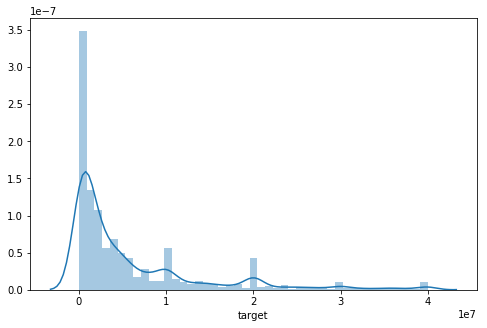

In [14]:
#plot a distribution plot to see the distribution of the target field
plt.figure(figsize=(8,5))
sns.distplot(train['target'])

This seems to be a highly skewed target variable. Let's take the log of it to check the distribution

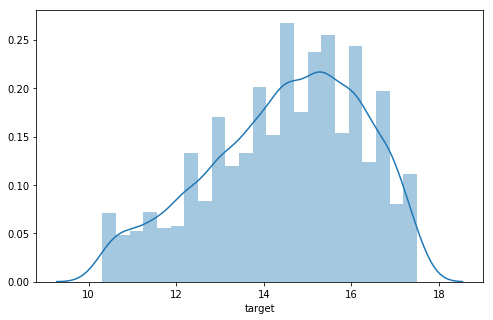

In [15]:
plt.figure(figsize=(8,5))
sns.distplot(np.log1p(train['target']), kde='False')

Better distributed now! Let's check the train.info after taking the log

In [16]:
np.log1p(train['target']).describe()

count    4459.000000
mean       14.490239
std         1.750947
min        10.308986
25%        13.304687
50%        14.630876
75%        15.894952
max        17.504390
Name: target, dtype: float64

This is a LOT better! Helps us better understand the distribution of the 'target' column. Lets plot some scatter plots with a few other variabls to see its spread. Let's pick the first column '48df886f9'

C:\Users\madhs\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0,0.5,'Target')

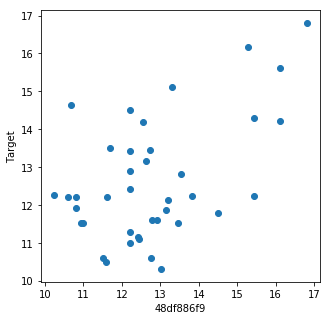

In [17]:
plt.figure(figsize=(5,5))
plt.scatter(np.log(train['48df886f9']),np.log(train['target']))
plt.xlabel('48df886f9')
plt.ylabel('Target')

Perform some basic checks on the target column.

In [18]:
train['target'].sort_values(ascending=False)

713     40000000.00
1968    40000000.00
3662    40000000.00
730     40000000.00
3591    40000000.00
2619    40000000.00
1891    40000000.00
3467    40000000.00
985     40000000.00
4111    40000000.00
2354    40000000.00
173     40000000.00
348     40000000.00
2160    40000000.00
4220    40000000.00
2265    40000000.00
2266    40000000.00
2320    40000000.00
2336    40000000.00
3132    40000000.00
2341    40000000.00
3668    40000000.00
3783    40000000.00
2859    40000000.00
4001    40000000.00
2818    40000000.00
1341    40000000.00
1415    40000000.00
4305    40000000.00
1276    40000000.00
           ...     
649        32000.00
1972       32000.00
1237       32000.00
3498       31333.34
604        30000.00
2546       30000.00
1753       30000.00
4270       30000.00
3491       30000.00
3698       30000.00
1749       30000.00
4269       30000.00
1187       30000.00
2027       30000.00
3763       30000.00
1060       30000.00
3833       30000.00
997        30000.00
739        30000.00


We can see that "target" variable ranges from values of 10^5 to 10^9.
Next Check the count of the most common target value

In [19]:
Counter(train['target']).most_common()

[(2000000.0, 207),
 (10000000.0, 199),
 (20000000.0, 156),
 (4000000.0, 148),
 (1000000.0, 129),
 (400000.0, 115),
 (200000.0, 113),
 (5000000.0, 101),
 (6000000.0, 88),
 (600000.0, 84),
 (8000000.0, 65),
 (3000000.0, 61),
 (800000.0, 59),
 (100000.0, 44),
 (40000.0, 40),
 (40000000.0, 40),
 (30000000.0, 39),
 (500000.0, 39),
 (1200000.0, 39),
 (300000.0, 37),
 (1600000.0, 33),
 (7000000.0, 31),
 (1400000.0, 31),
 (1500000.0, 30),
 (1800000.0, 28),
 (700000.0, 28),
 (30000.0, 26),
 (50000.0, 25),
 (60000.0, 24),
 (14000000.0, 21),
 (15000000.0, 21),
 (12000000.0, 20),
 (2500000.0, 20),
 (16000000.0, 19),
 (2400000.0, 18),
 (9000000.0, 17),
 (11000000.0, 16),
 (2200000.0, 15),
 (18000000.0, 14),
 (2800000.0, 13),
 (24000000.0, 13),
 (120000.0, 13),
 (25000000.0, 12),
 (150000.0, 12),
 (900000.0, 12),
 (1100000.0, 11),
 (3600000.0, 11),
 (160000.0, 11),
 (3500000.0, 11),
 (450000.0, 11),
 (36000000.0, 11),
 (3200000.0, 11),
 (80000.0, 11),
 (4500000.0, 10),
 (2600000.0, 10),
 (1900000.0,

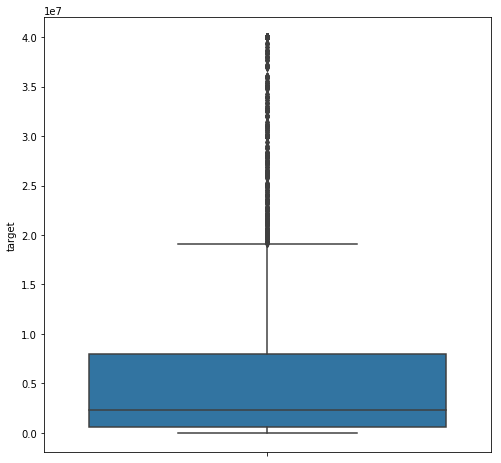

In [20]:
#Plot a boxplot
plt.figure(figsize=(8,8))
sns.boxplot(train['target'], orient='v')

In [22]:
#separate the x and y variables for the train and test data
#taking the log of the target variable as it is not well distributed.
x_train = train.iloc[:,train.columns!='target']
y_train = np.log1p(train.iloc[:,train.columns=='target'])
x_test = test

In [23]:
#copy the x_train, y_train, and x_test datasets
x_train_copy= x_train.copy()
x_test_copy= x_test.copy()
y_train_copy= y_train.copy()

In [24]:
x_train.columns

Index(['48df886f9', '0deb4b6a8', '34b15f335', 'a8cb14b00', '2f0771a37',
       '30347e683', 'd08d1fbe3', '6ee66e115', '20aa07010', 'dc5a8f1d8',
       ...
       '3ecc09859', '9281abeea', '8675bec0b', '3a13ed79a', 'f677d4d13',
       '71b203550', '137efaa80', 'fb36b89d9', '7e293fbaf', '9fc776466'],
      dtype='object', length=4991)

In [25]:
print(y_train.head(10))

      target
0  17.453097
1  13.304687
2  16.118096
3  14.508658
4  16.482739
5  14.845130
6  12.007628
7  13.304687
8  13.794288
9  13.038984


In [26]:
print(x_train.shape)

(4459, 4991)


In [27]:
print(y_train.shape)

(4459, 1)


In [28]:
x_test.shape

(49342, 4991)

In [29]:
train.columns

Index(['target', '48df886f9', '0deb4b6a8', '34b15f335', 'a8cb14b00',
       '2f0771a37', '30347e683', 'd08d1fbe3', '6ee66e115', '20aa07010',
       ...
       '3ecc09859', '9281abeea', '8675bec0b', '3a13ed79a', 'f677d4d13',
       '71b203550', '137efaa80', 'fb36b89d9', '7e293fbaf', '9fc776466'],
      dtype='object', length=4992)

**Remove the columns with standard deviation = 0 from test and train set.**

Standard Deviation = 0 means that **every data point in a column is equal to its mean**. Also means that all of a column's values are **identical**.
Such columns really do not help us in prediction. So we will drop them

In [30]:
drop_cols=[]
for cols in x_train.columns:
    if x_train[cols].std()==0:
        drop_cols.append(cols)
print("Number of constant columns to be dropped: ", len(drop_cols))
print(drop_cols)
x_train.drop(drop_cols,axis=1, inplace = True)

Number of constant columns to be dropped:  256
['d5308d8bc', 'c330f1a67', 'eeac16933', '7df8788e8', '5b91580ee', '6f29fbbc7', '46dafc868', 'ae41a98b6', 'f416800e9', '6d07828ca', '7ac332a1d', '70ee7950a', '833b35a7c', '2f9969eab', '8b1372217', '68322788b', '2288ac1a6', 'dc7f76962', '467044c26', '39ebfbfd9', '9a5ff8c23', 'f6fac27c8', '664e2800e', 'ae28689a2', 'd87dcac58', '4065efbb6', 'f944d9d43', 'c2c4491d5', 'a4346e2e2', '1af366d4f', 'cfff5b7c8', 'da215e99e', '5acd26139', '9be9c6cef', '1210d0271', '21b0a54cb', 'da35e792b', '754c502dd', '0b346adbd', '0f196b049', 'b603ed95d', '2a50e001c', '1e81432e7', '10350ea43', '3c7c7e24c', '7585fce2a', '64d036163', 'f25d9935c', 'd98484125', '95c85e227', '9a5273600', '746cdb817', '6377a6293', '7d944fb0c', '87eb21c50', '5ea313a8c', '0987a65a1', '2fb7c2443', 'f5dde409b', '1ae50d4c3', '2b21cd7d8', '0db8a9272', '804d8b55b', '76f135fa6', '7d7182143', 'f88e61ae6', '378ed28e0', 'ca4ba131e', '1352ddae5', '2b601ad67', '6e42ff7c7', '22196a84c', '0e410eb3d', '99

C:\Users\madhs\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Check for constant columns on the test data

In [31]:
drop_cols_test=[]
for cols in x_test.columns:
    if x_test[cols].std()==0:
        drop_cols_test.append(cols)
print("Number of constant columns to be dropped: ", len(drop_cols_test))
print(drop_cols_test)

Number of constant columns to be dropped:  0
[]


There are no constant columns from the test data. However, we still need to drop them as the shapes of the test and the train data need to be the same for modelling.

In [32]:
x_test.drop(drop_cols,axis=1, inplace = True)

In [33]:
x_train.shape

(4459, 4735)

In [34]:
x_test.shape

(49342, 4735)

**DIMENSIONALITY REDUCTION**

One of the major problems with this dataset is that it has too many predictors (almost 4900+). To go through each of these predictors and see which ones are significant for the model is going to be a tedious task. Instead, we can use one of the all-time favourite dimensionality reduction technique - Principle Component Analysis.
Before we can use PCA, we need to **STANDARDISE** the data (Standardisation and Normalization are used inter-dependently. Standardisation is moulding the data to between -1 and +1 data points. Normalisation is normalising the data so that the data points lie along the mean.)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [36]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [37]:
print(x_train)

[[-0.03764565 -0.02163947 -0.04688961 ..., -0.07234203 -0.05636327
  -0.12585201]
 [-0.03764565 -0.02163947 -0.04688961 ..., -0.07234203 -0.05636327
  -0.12585201]
 [-0.03764565 -0.02163947 -0.04688961 ..., -0.07234203 -0.05636327
  -0.12585201]
 ..., 
 [-0.03764565 -0.02163947 -0.04688961 ..., -0.07234203 -0.05636327
  -0.12585201]
 [-0.03764565 -0.02163947 -0.04688961 ..., -0.07234203 -0.05636327
  -0.12585201]
 [-0.03764565 -0.02163947 -0.04688961 ..., -0.07234203 -0.05636327
  -0.12585201]]


Now that the data is scaled, we shall use PCA

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca_x = PCA(0.95).fit(x_train)

In [40]:
print('%d components explain 95%% of the variation in data' % pca_x.n_components_)

1527 components explain 95% of the variation in data


We can see that the first 1527 Principal Components attribute for about 95% variation in the data. We shall use these 1527 for our prediction

In [41]:
pca = PCA(n_components=1527)
#fit with 1527 components on train data
pca.fit(x_train)
#transform on train data
x_train_pca = pca.transform(x_train)
#transform on test data
x_test_pca = pca.transform(x_test)

**MODELLING AND PREDICTION** 

We shall use the following classifiers for our prediction

-- Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train_pca, y_train)

C:\Users\madhs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [43]:
rf_pca_predict = rf.predict(x_test_pca)

In [44]:
rf_pca_predict = np.expm1(rf_pca_predict)
print(rf_pca_predict)

[  987671.24696643   859629.10551558  2874079.69836335 ...,
   698412.06748007  1433789.25760507  1123368.97003848]


In [45]:
print(len(rf_pca_predict))

49342


In [57]:
#Write to submission file
submission = pd.read_csv('F:\\Imarticus-DSP\\Competitions\\Kaggle\\Santander Value Prediction\\sample_submission.csv')
submission['target'] = rf_pca_predict
print(rf_pca_predict)
submission.to_csv('Submission_PCA.csv', index=False)

[  987671.24696643   859629.10551558  2874079.69836335 ...,
   698412.06748007  1433789.25760507  1123368.97003848]


In [58]:
print(submission['target'])

0        9.876712e+05
1        8.596291e+05
2        2.874080e+06
3        2.768904e+06
4        6.596658e+05
5        1.212283e+06
6        5.827410e+05
7        3.125568e+05
8        1.411145e+06
9        7.244049e+06
10       3.385364e+06
11       2.820014e+06
12       3.631331e+06
13       4.791749e+05
14       3.231255e+06
15       7.183318e+05
16       1.101245e+06
17       3.182378e+06
18       3.269445e+06
19       1.777259e+06
20       4.392599e+05
21       2.338480e+06
22       2.676595e+06
23       6.925334e+05
24       1.087844e+06
25       1.283429e+06
26       1.025038e+06
27       1.541408e+06
28       2.479984e+06
29       1.687747e+06
             ...     
49312    5.035382e+05
49313    1.639656e+06
49314    2.722988e+06
49315    1.121322e+06
49316    9.400740e+05
49317    1.859426e+06
49318    6.715090e+05
49319    2.900619e+05
49320    4.924131e+05
49321    3.080001e+06
49322    1.094795e+06
49323    2.918237e+05
49324    3.974995e+05
49325    3.738686e+06
49326    1

**USING TSVD**

TSVD, which stands for Truncated Single Vector Decomposition is a dimensonality reduction methodology. Unlike PCA, we do not need to standardise the data before we pass it through a TSVD.
One of the main parameters is n_components which should be LESS THAN the number of dimensions.
For the sake of this problem, I shall randomly pick n_components as 1500, and then write a code to choose those components which attribute for 95% of variation in the data.
I am going to use the copies of the x_train, x_test, y_train datasets for TSVD.

In [59]:
from sklearn.decomposition import TruncatedSVD

In [60]:
svd_x = TruncatedSVD(n_components=1500,n_iter=20, random_state=42)
svd_x.fit(x_train_copy)

TruncatedSVD(algorithm='randomized', n_components=1500, n_iter=20,
       random_state=42, tol=0.0)

In [61]:
#code to select those components which attribute for 95% of variance in data
count = 0
for index, cumsum in enumerate(np.cumsum(svd_x.explained_variance_ratio_)):
    if cumsum <=0.95:
      count+=1  
    else:
        break
print(count)

601


From the above result we can see that the first 601 components attrribte for 95% of the variation in data. We shall use these 601 components

In [62]:
svd = TruncatedSVD(n_components=601, random_state=42)
#fit the TSVD on the train data
svd.fit(x_train_copy)
#transform on the x_train data
x_train_svd = svd.transform(x_train_copy)
#transform on the x_test data
x_test_svd = svd.transform(x_test_copy)

Use a Random Forest Regressor for modelling and prediction

In [63]:
rf.fit(x_train_svd, y_train_copy)
rf_tsvd_predict = rf.predict(x_test_svd)
rf_tsvd_predict = np.expm1(rf_tsvd_predict)

C:\Users\madhs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [64]:
print(rf_tsvd_predict)

[ 1808571.65855849  1091036.70094364  2589853.42927866 ...,
   801217.34505758  1970206.46070135  3353619.30402269]


In [67]:
submission_TSVD = pd.read_csv('F:\\Imarticus-DSP\\Competitions\\Kaggle\\Santander Value Prediction\\sample_submission.csv')
submission_TSVD ['target'] = rf_tsvd_predict
print(rf_tsvd_predict)
submission_TSVD.to_csv('Submission_TSVD.csv', index=False)

[ 1808571.65855849  1091036.70094364  2589853.42927866 ...,
   801217.34505758  1970206.46070135  3353619.30402269]


**CONCLUSION**

The score that I received in Kaggle for PCA was 2.5 and for TSVD was around 1.7. It is not a great score, but my intention was not to get a  great score. My intention was tp try to see which amongt the 2 - PCA and TSVD - gives me better accuracy for sparse data.

The accuracy can be greatly improved by fine tuning the random forest or by using other classfiers.